In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('df_final_chapter_1.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df['default payment next month'].head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [6]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
my_lr = LogisticRegression() ## i am instantiating the model

In [9]:
my_lr

LogisticRegression()

In [10]:
my_new_lr = LogisticRegression()

In [11]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [12]:
my_new_lr


LogisticRegression(C=0.1, solver='liblinear')

In [13]:
x = df['EDUCATION'][0:10].values.reshape(-1,1)
x

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [14]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
df['EDUCATION'][0:10].values.reshape(-1,1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [16]:
my_new_lr.fit(x,y)

LogisticRegression(C=0.1, solver='liblinear')

In [17]:
new_x = df['EDUCATION'][10:20].values.reshape(-1,1)
new_x

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [18]:
my_new_lr.predict(new_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [20]:
## genenrate synthetic data

In [21]:
from numpy.random import default_rng
rg = default_rng(12345)
x = rg.uniform(low = 0.0, high =10.0, size = (1000,))
x[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [22]:
slope = 0.25

In [23]:
intercept = -1.25
y = slope*x + intercept + rg.normal(loc = 0 , scale = 1, size = (1000,))

Text(0, 0.5, 'y vals')

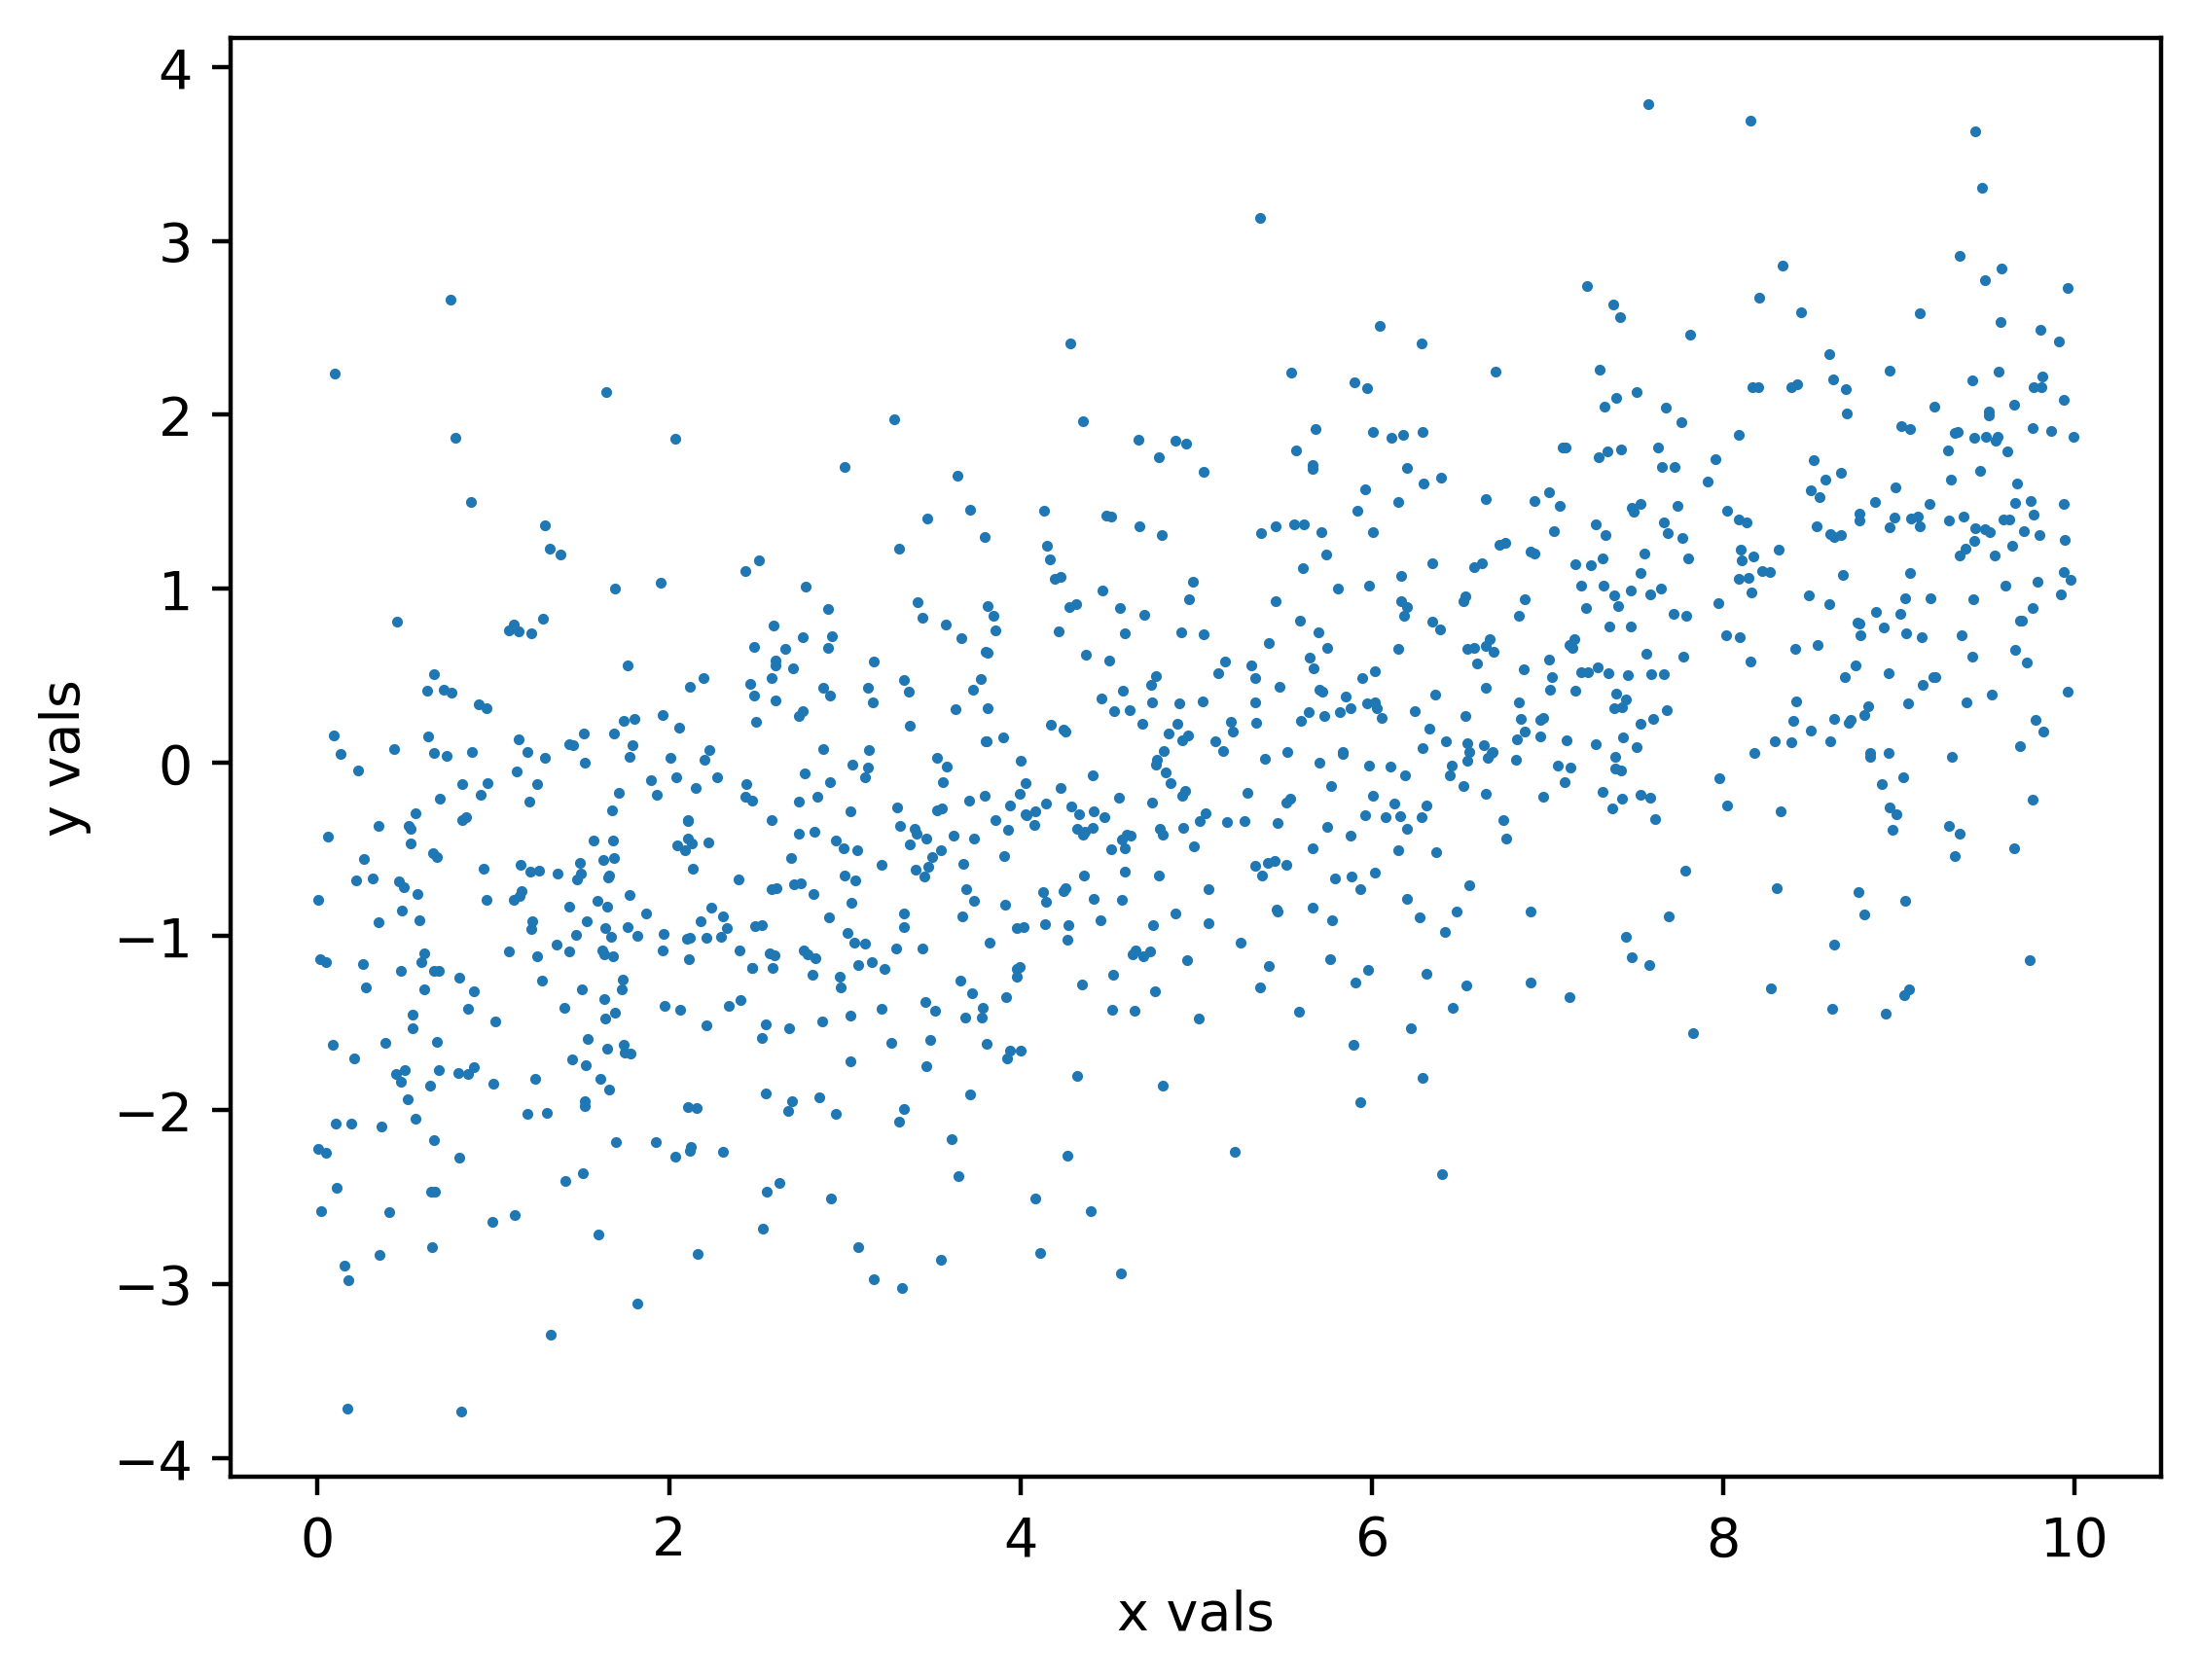

In [24]:
plt.scatter(x,y, s = 1,)
plt.xlabel('x vals')
plt.ylabel('y vals')

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept= True , normalize=False, copy_X= True, n_jobs = None)

In [26]:
lin_reg

LinearRegression(normalize=False)

In [27]:
lin_reg.fit(x.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675905
[0.25711689]


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [28]:
y_pred = lin_reg.predict(x.reshape(-1,1))

Text(0, 0.5, 'y vals')

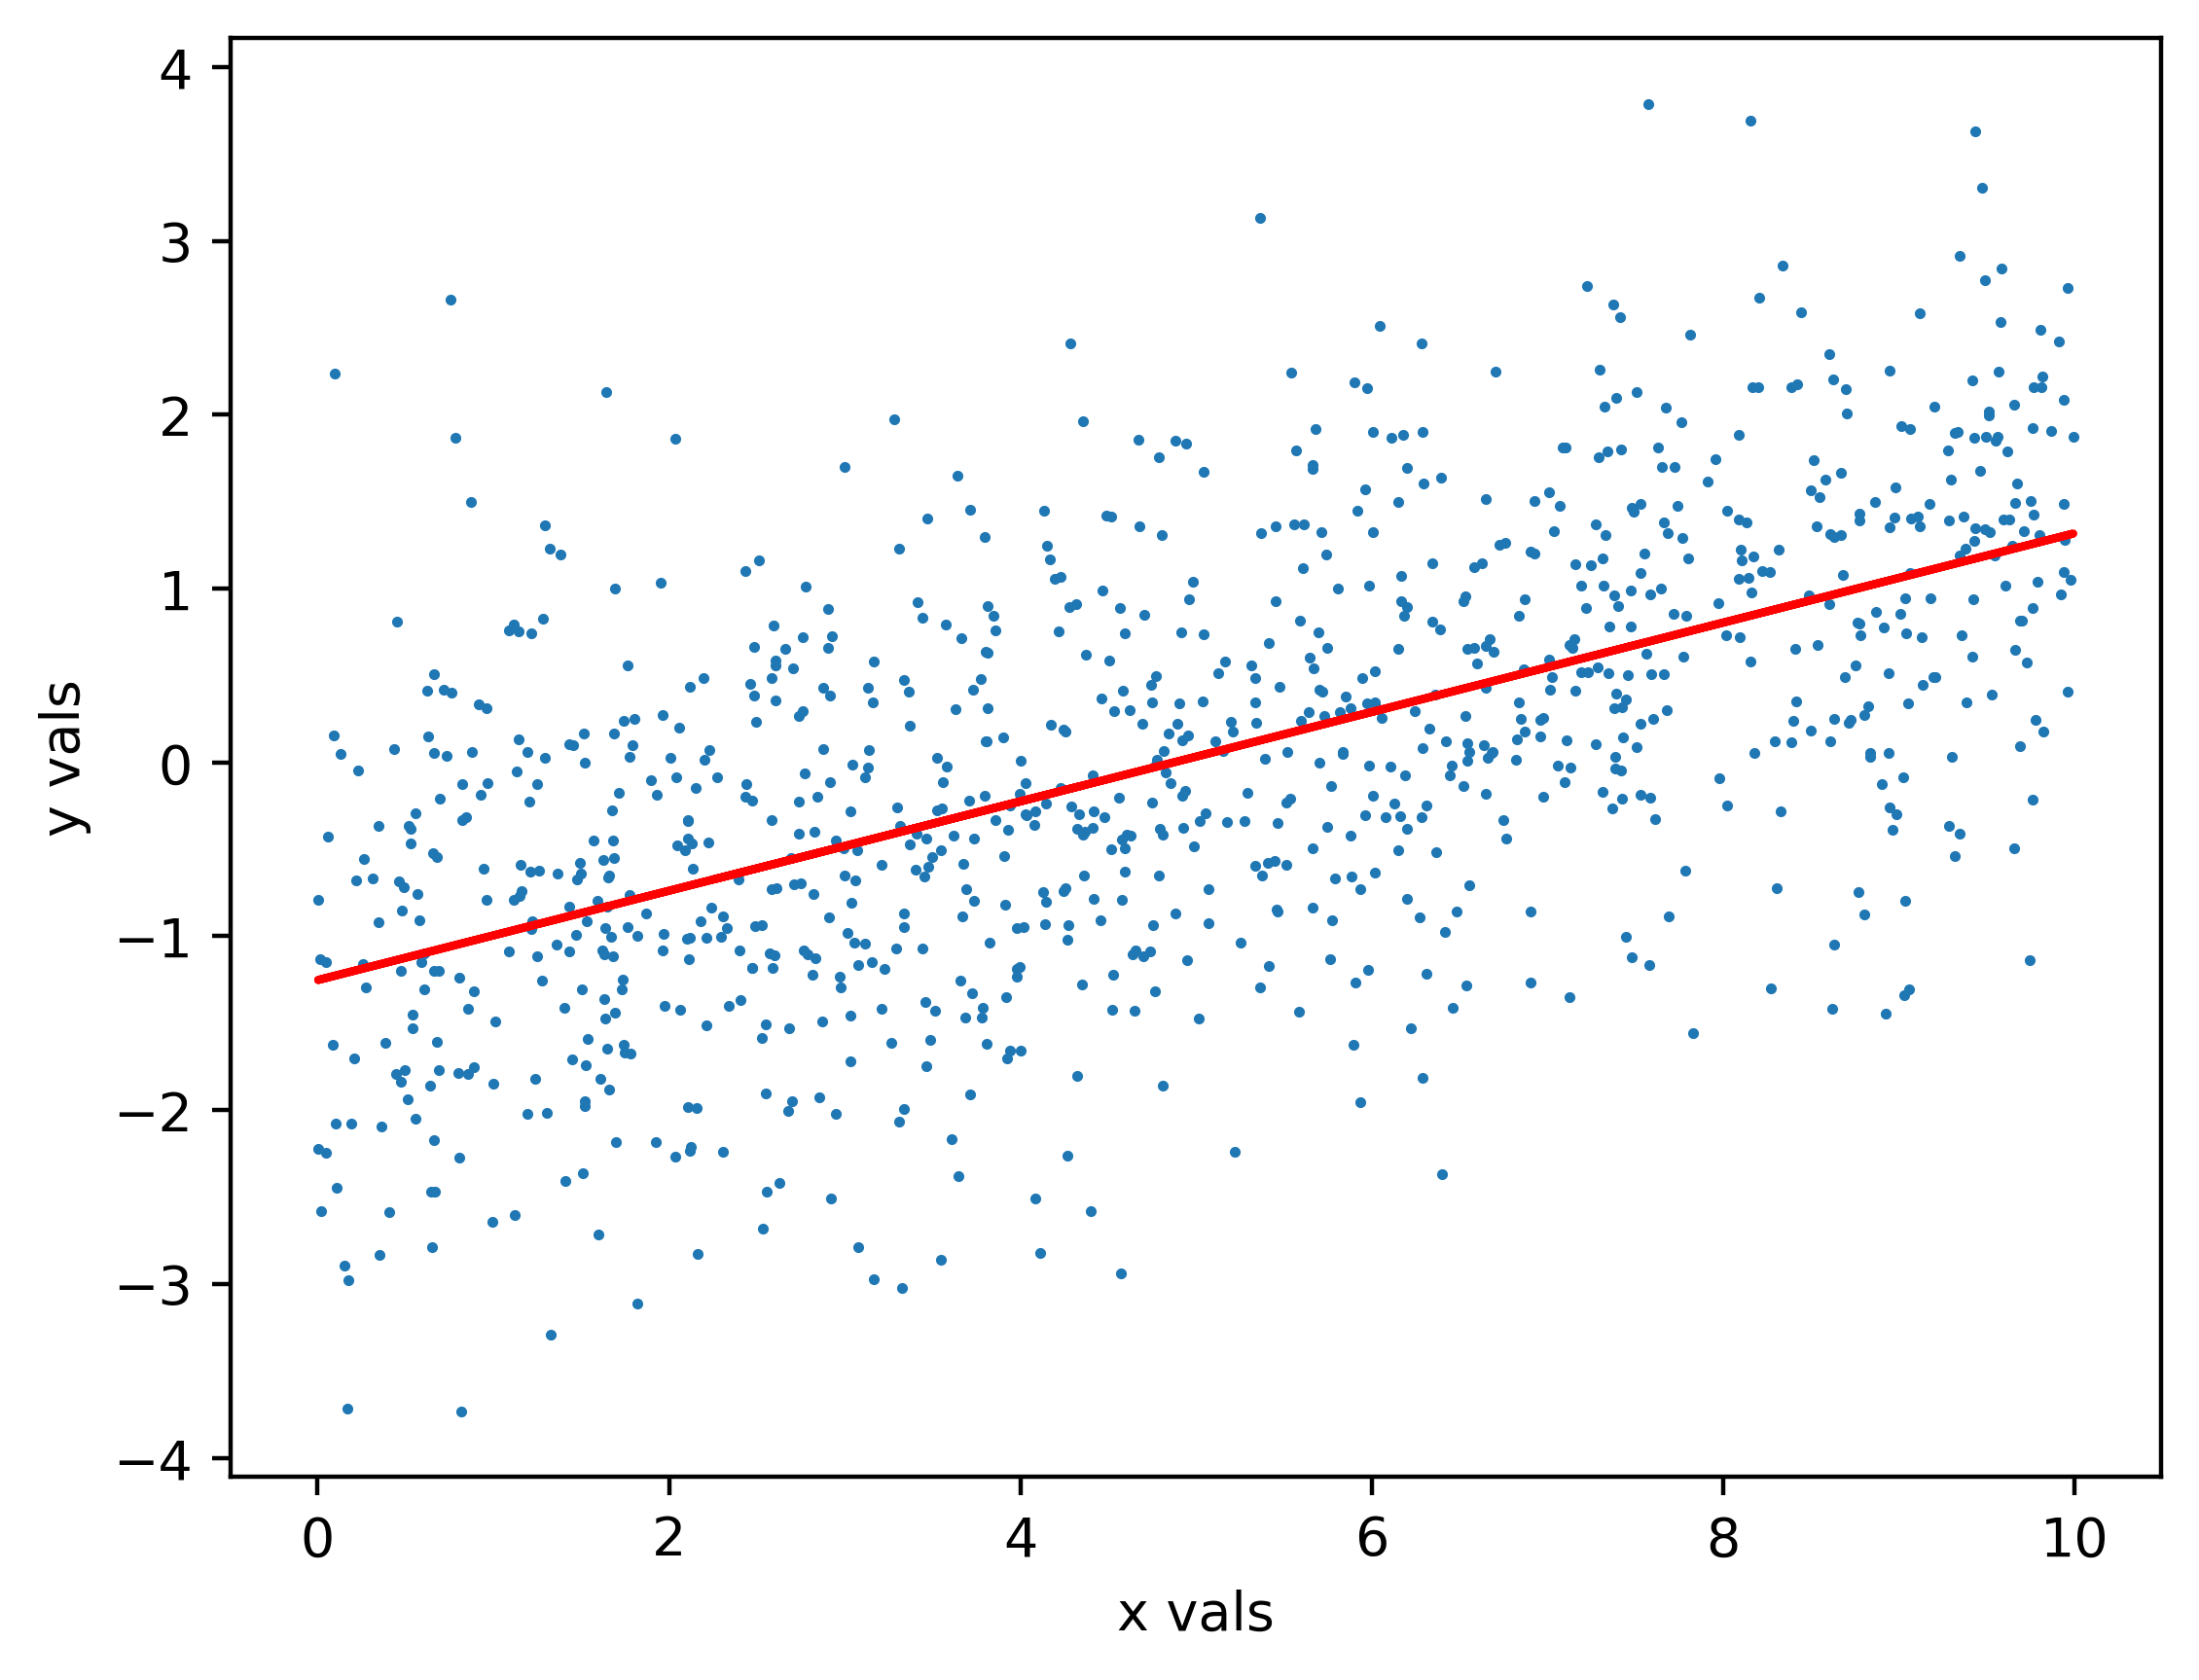

In [29]:
plt.scatter(x,y, s = 1,)
plt.plot(x,y_pred,'r')
plt.xlabel('x vals')
plt.ylabel('y vals')

## Train Test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),
                                                    df['default payment next month'].values,
                                                   test_size= 0.2,
                                                   random_state= 24)

In [32]:
df['EDUCATION'].values.reshape(-1,1)

array([[2],
       [2],
       [2],
       ...,
       [2],
       [3],
       [2]], dtype=int64)

In [33]:
df['EDUCATION'].values

array([2, 2, 2, ..., 2, 3, 2], dtype=int64)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21331, 1), (5333, 1), (21331,), (5333,))

In [35]:
##random_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split. 
#Pass an int for reproducible output across multiple function calls. See Glossary.

In [36]:
np.mean(y_test), np.mean(y_train)

(0.21657603600225014, 0.223102526838873)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
eg_lr = LogisticRegression(C =0.1 , solver = 'liblinear')

In [39]:
eg_lr.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [40]:
y_pred = eg_lr.predict(x_test)

In [41]:
is_correct = y_pred == y_test

In [42]:
np.mean(is_correct)

0.7834239639977498

In [43]:
eg_lr.score(x_test,y_test)

0.7834239639977498

In [44]:
from sklearn import metrics

In [45]:
metrics.accuracy_score(y_pred, y_test)

0.7834239639977498

In [46]:
P = sum(y_test)
P

1155

In [47]:
TP = sum((y_test ==1)&(y_pred == 1))
TP

0

In [48]:
print('The tru posistive is {}'.format(TP))

The tru posistive is 0


In [49]:
N = sum(y_test == 0)
N

4178

In [50]:
TN = sum((y_test == 0)& (y_pred == 0))
TN

4178

In [51]:
FP = sum((y_test == 0) & (y_pred == 1))
FP

0

In [52]:
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [53]:
y_pred_prob = eg_lr.predict_proba(x_test)
y_pred_prob

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

### first column  = negative class
### second column = positive class

In [54]:
y_pred_prob.shape

(5333, 2)

In [55]:
##scikit-learn will report the probability of
##negative class membership as the first column, and positive class membership as
##the second.

In [56]:
prob_sum = np.sum(y_pred_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [57]:
prob_sum.shape

(5333,)

In [58]:
np.unique(prob_sum)

array([1.])

In [59]:
pos_prob = y_pred_prob[:,1]
pos_prob

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

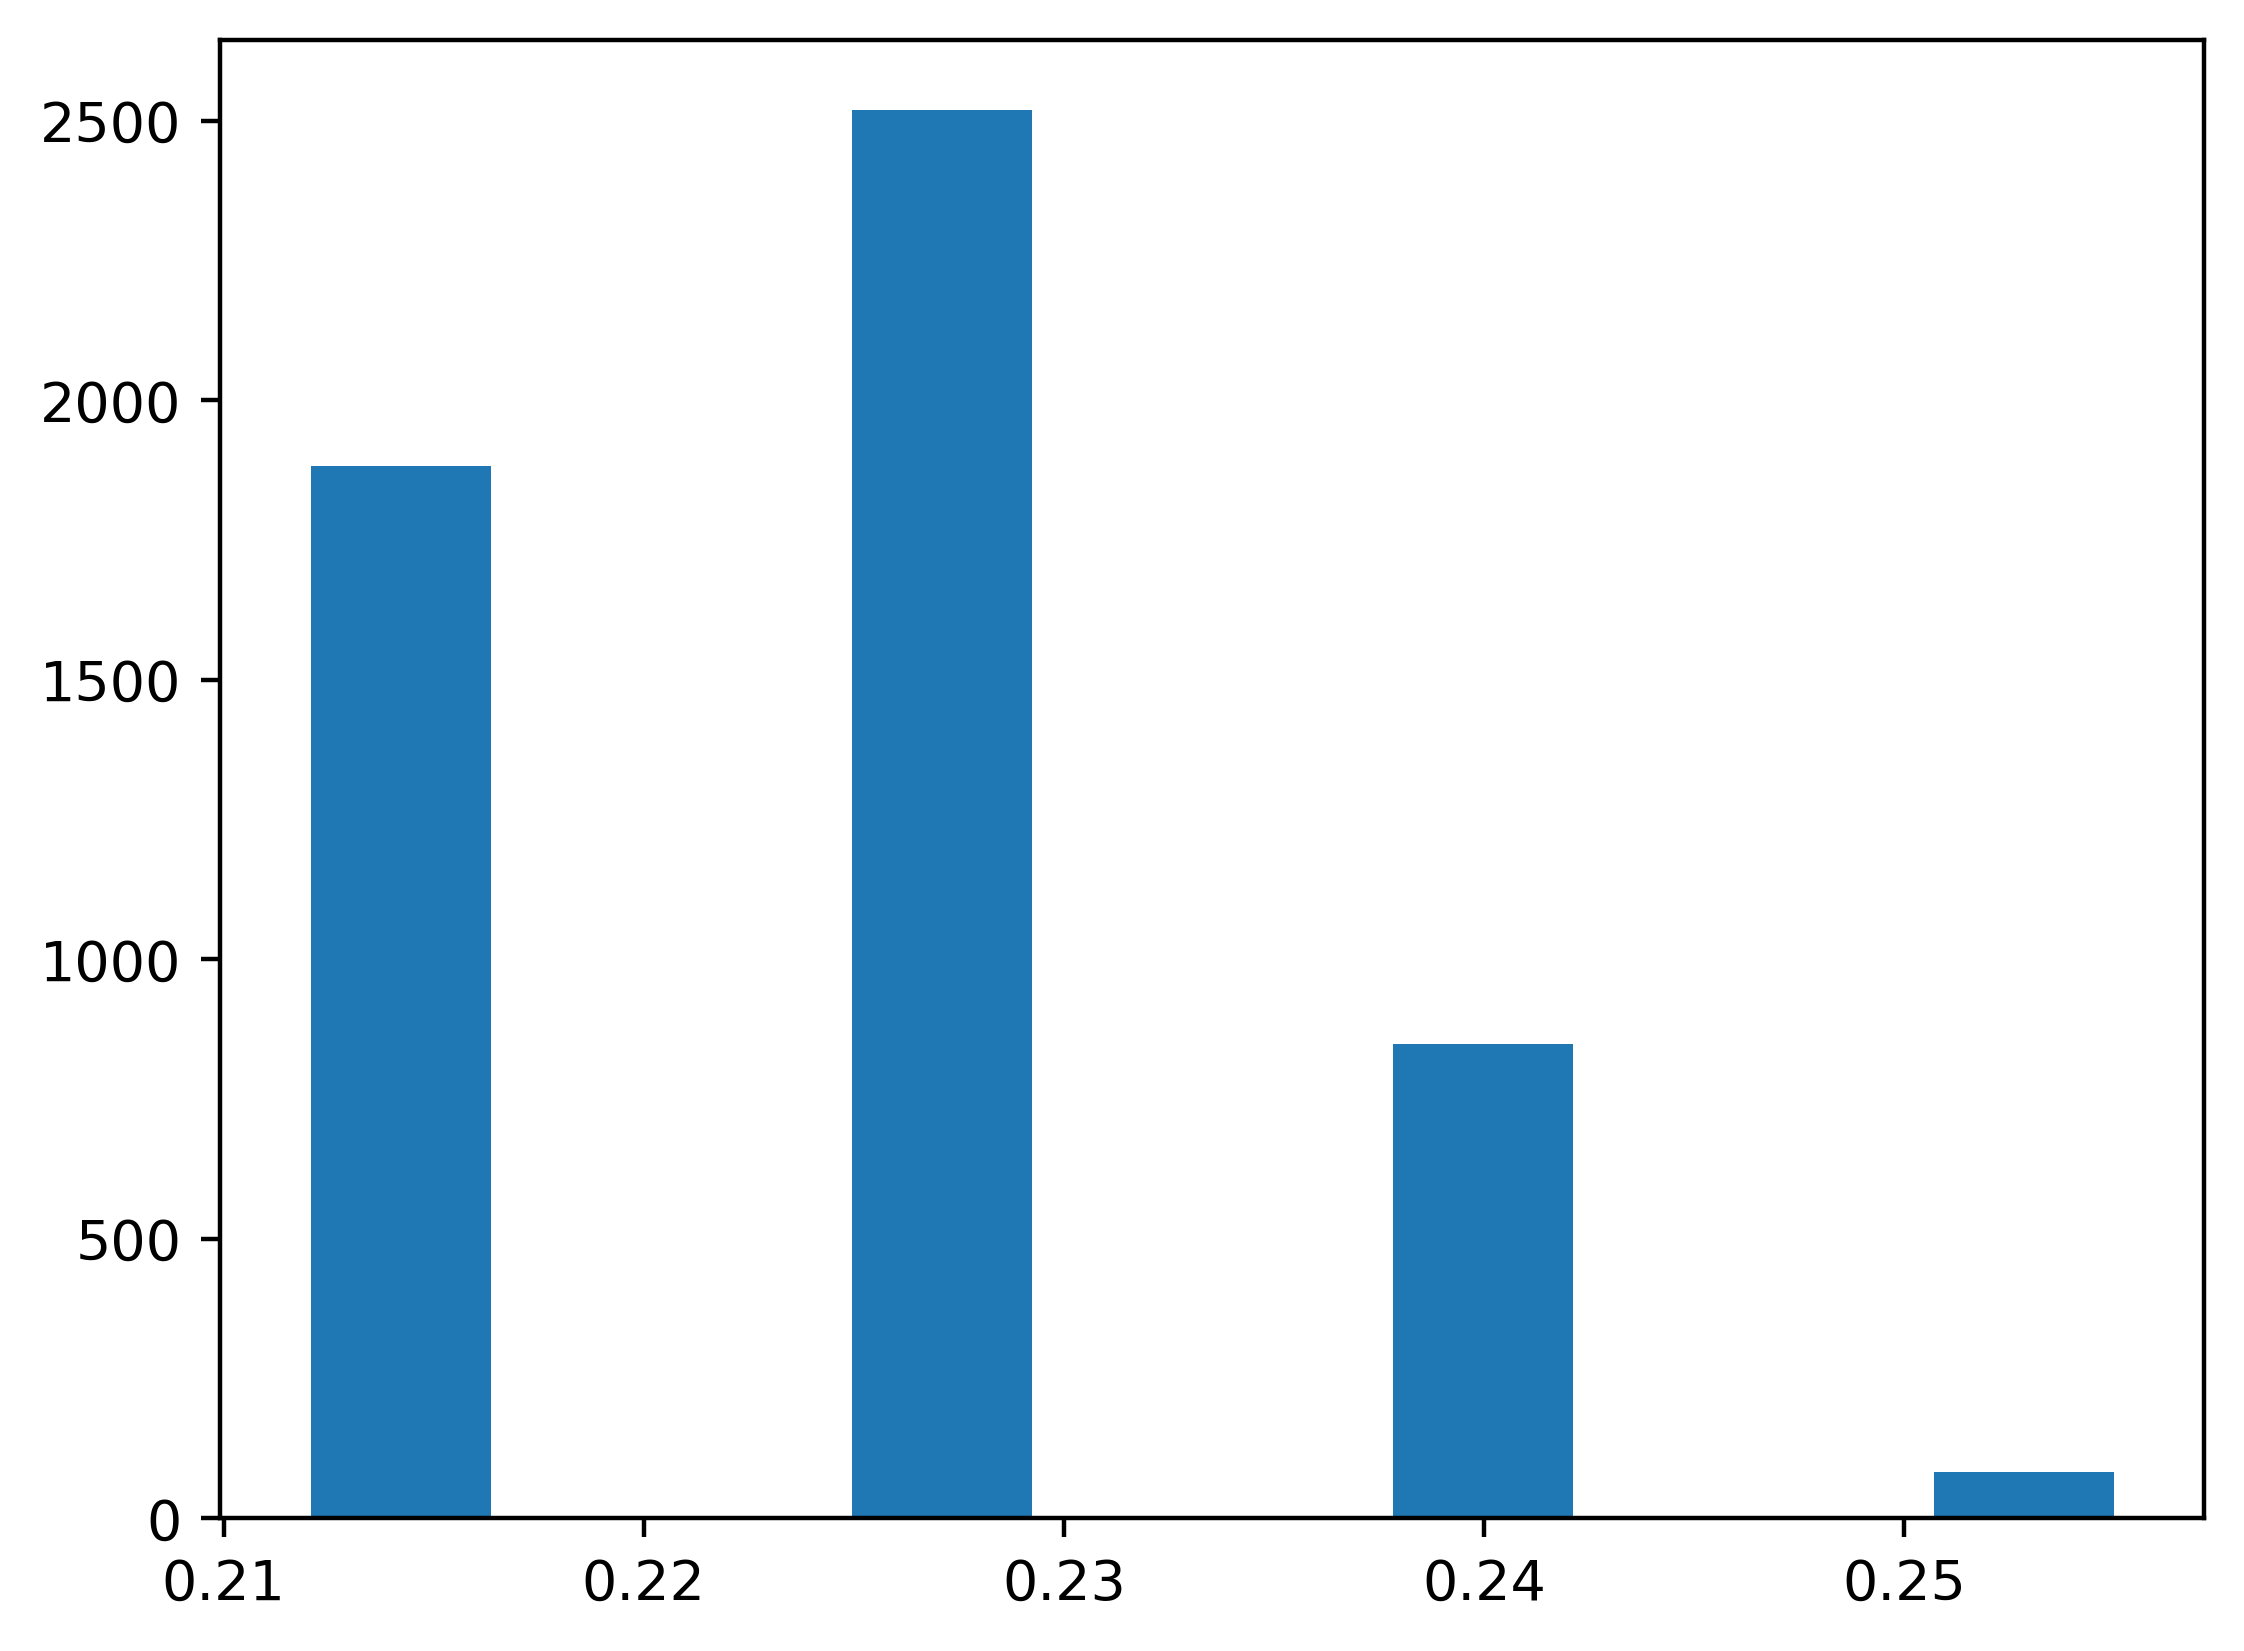

In [60]:
plt.hist(pos_prob)

In [62]:
df['EDUCATION']

0        2
1        2
2        2
3        2
4        2
        ..
26659    3
26660    3
26661    2
26662    3
26663    2
Name: EDUCATION, Length: 26664, dtype: int64

In [64]:
pos_sample_pos_prob = pos_prob[y_test == 1]
neg_sample_pos_prob = pos_prob[y_test == 0]

Text(0, 0.5, 'No of sample')

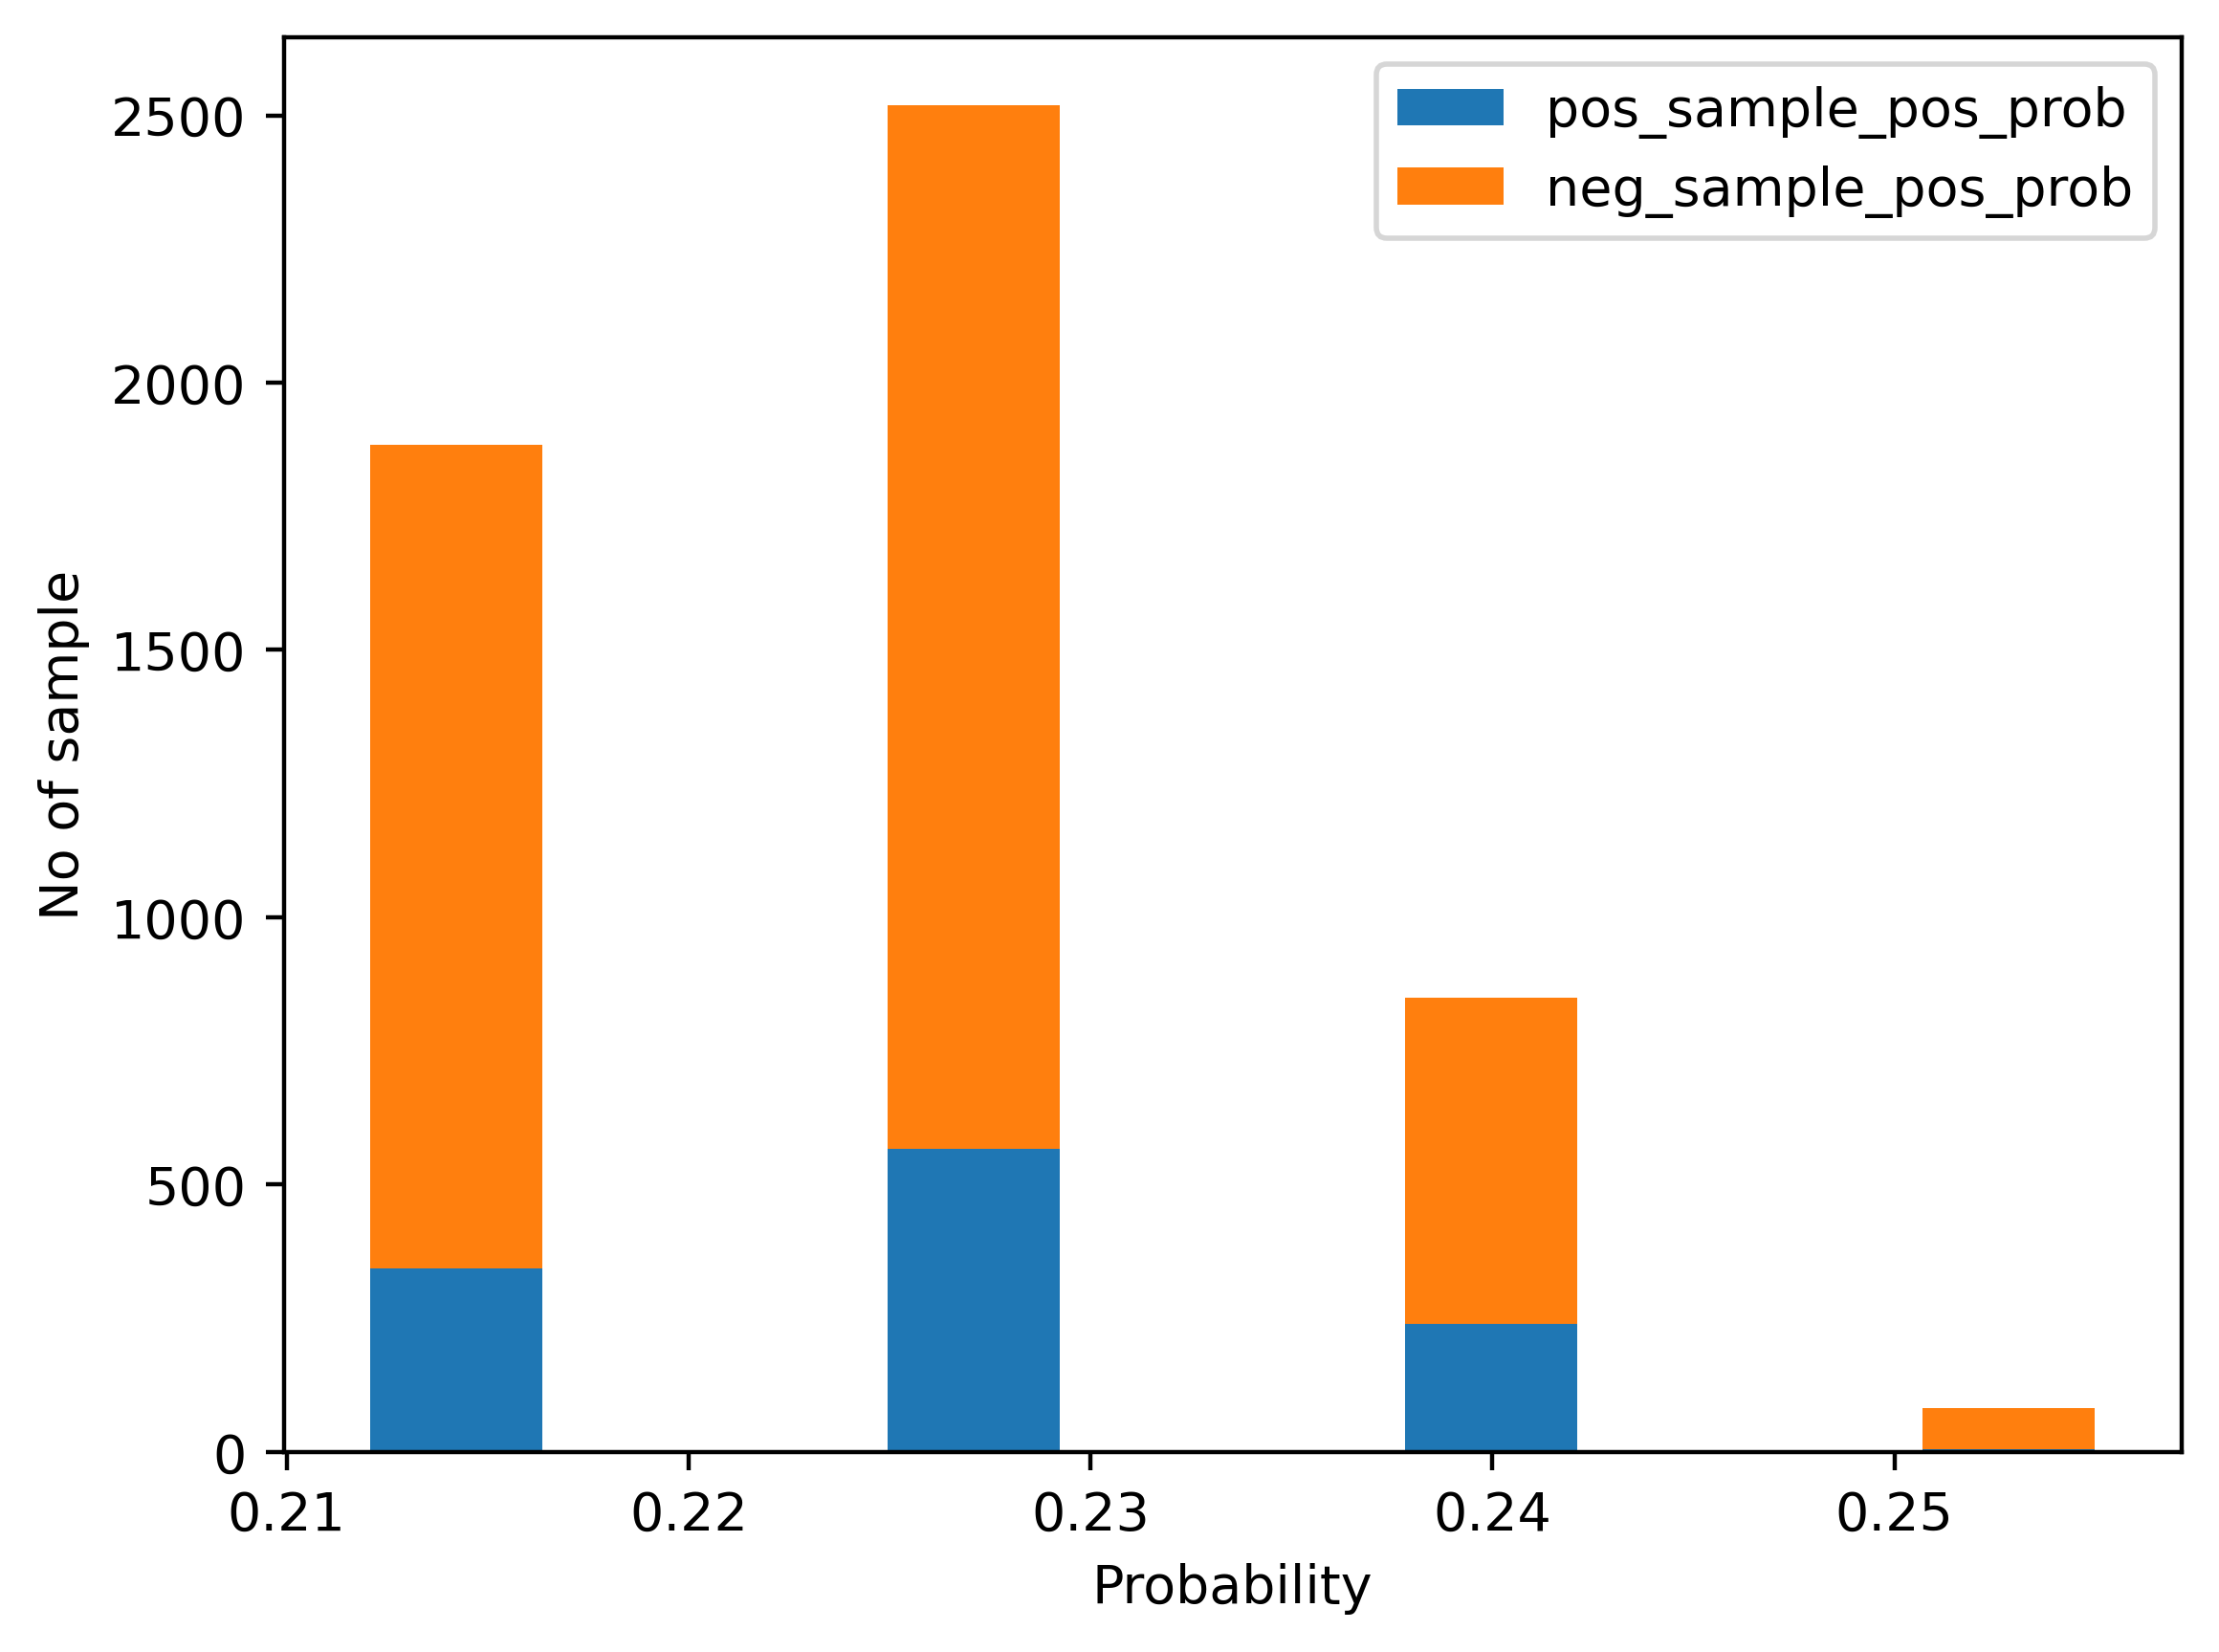

In [68]:
plt.hist([pos_sample_pos_prob,neg_sample_pos_prob], histtype = 'barstacked')
plt.legend(['pos_sample_pos_prob','neg_sample_pos_prob'])
plt.xlabel('Probability')
plt.ylabel('No of sample')

In [69]:
from sklearn import metrics

In [71]:
fpr, tpr , thresholds = metrics.roc_curve(y_test, pos_prob)

(-0.01, 2.0)

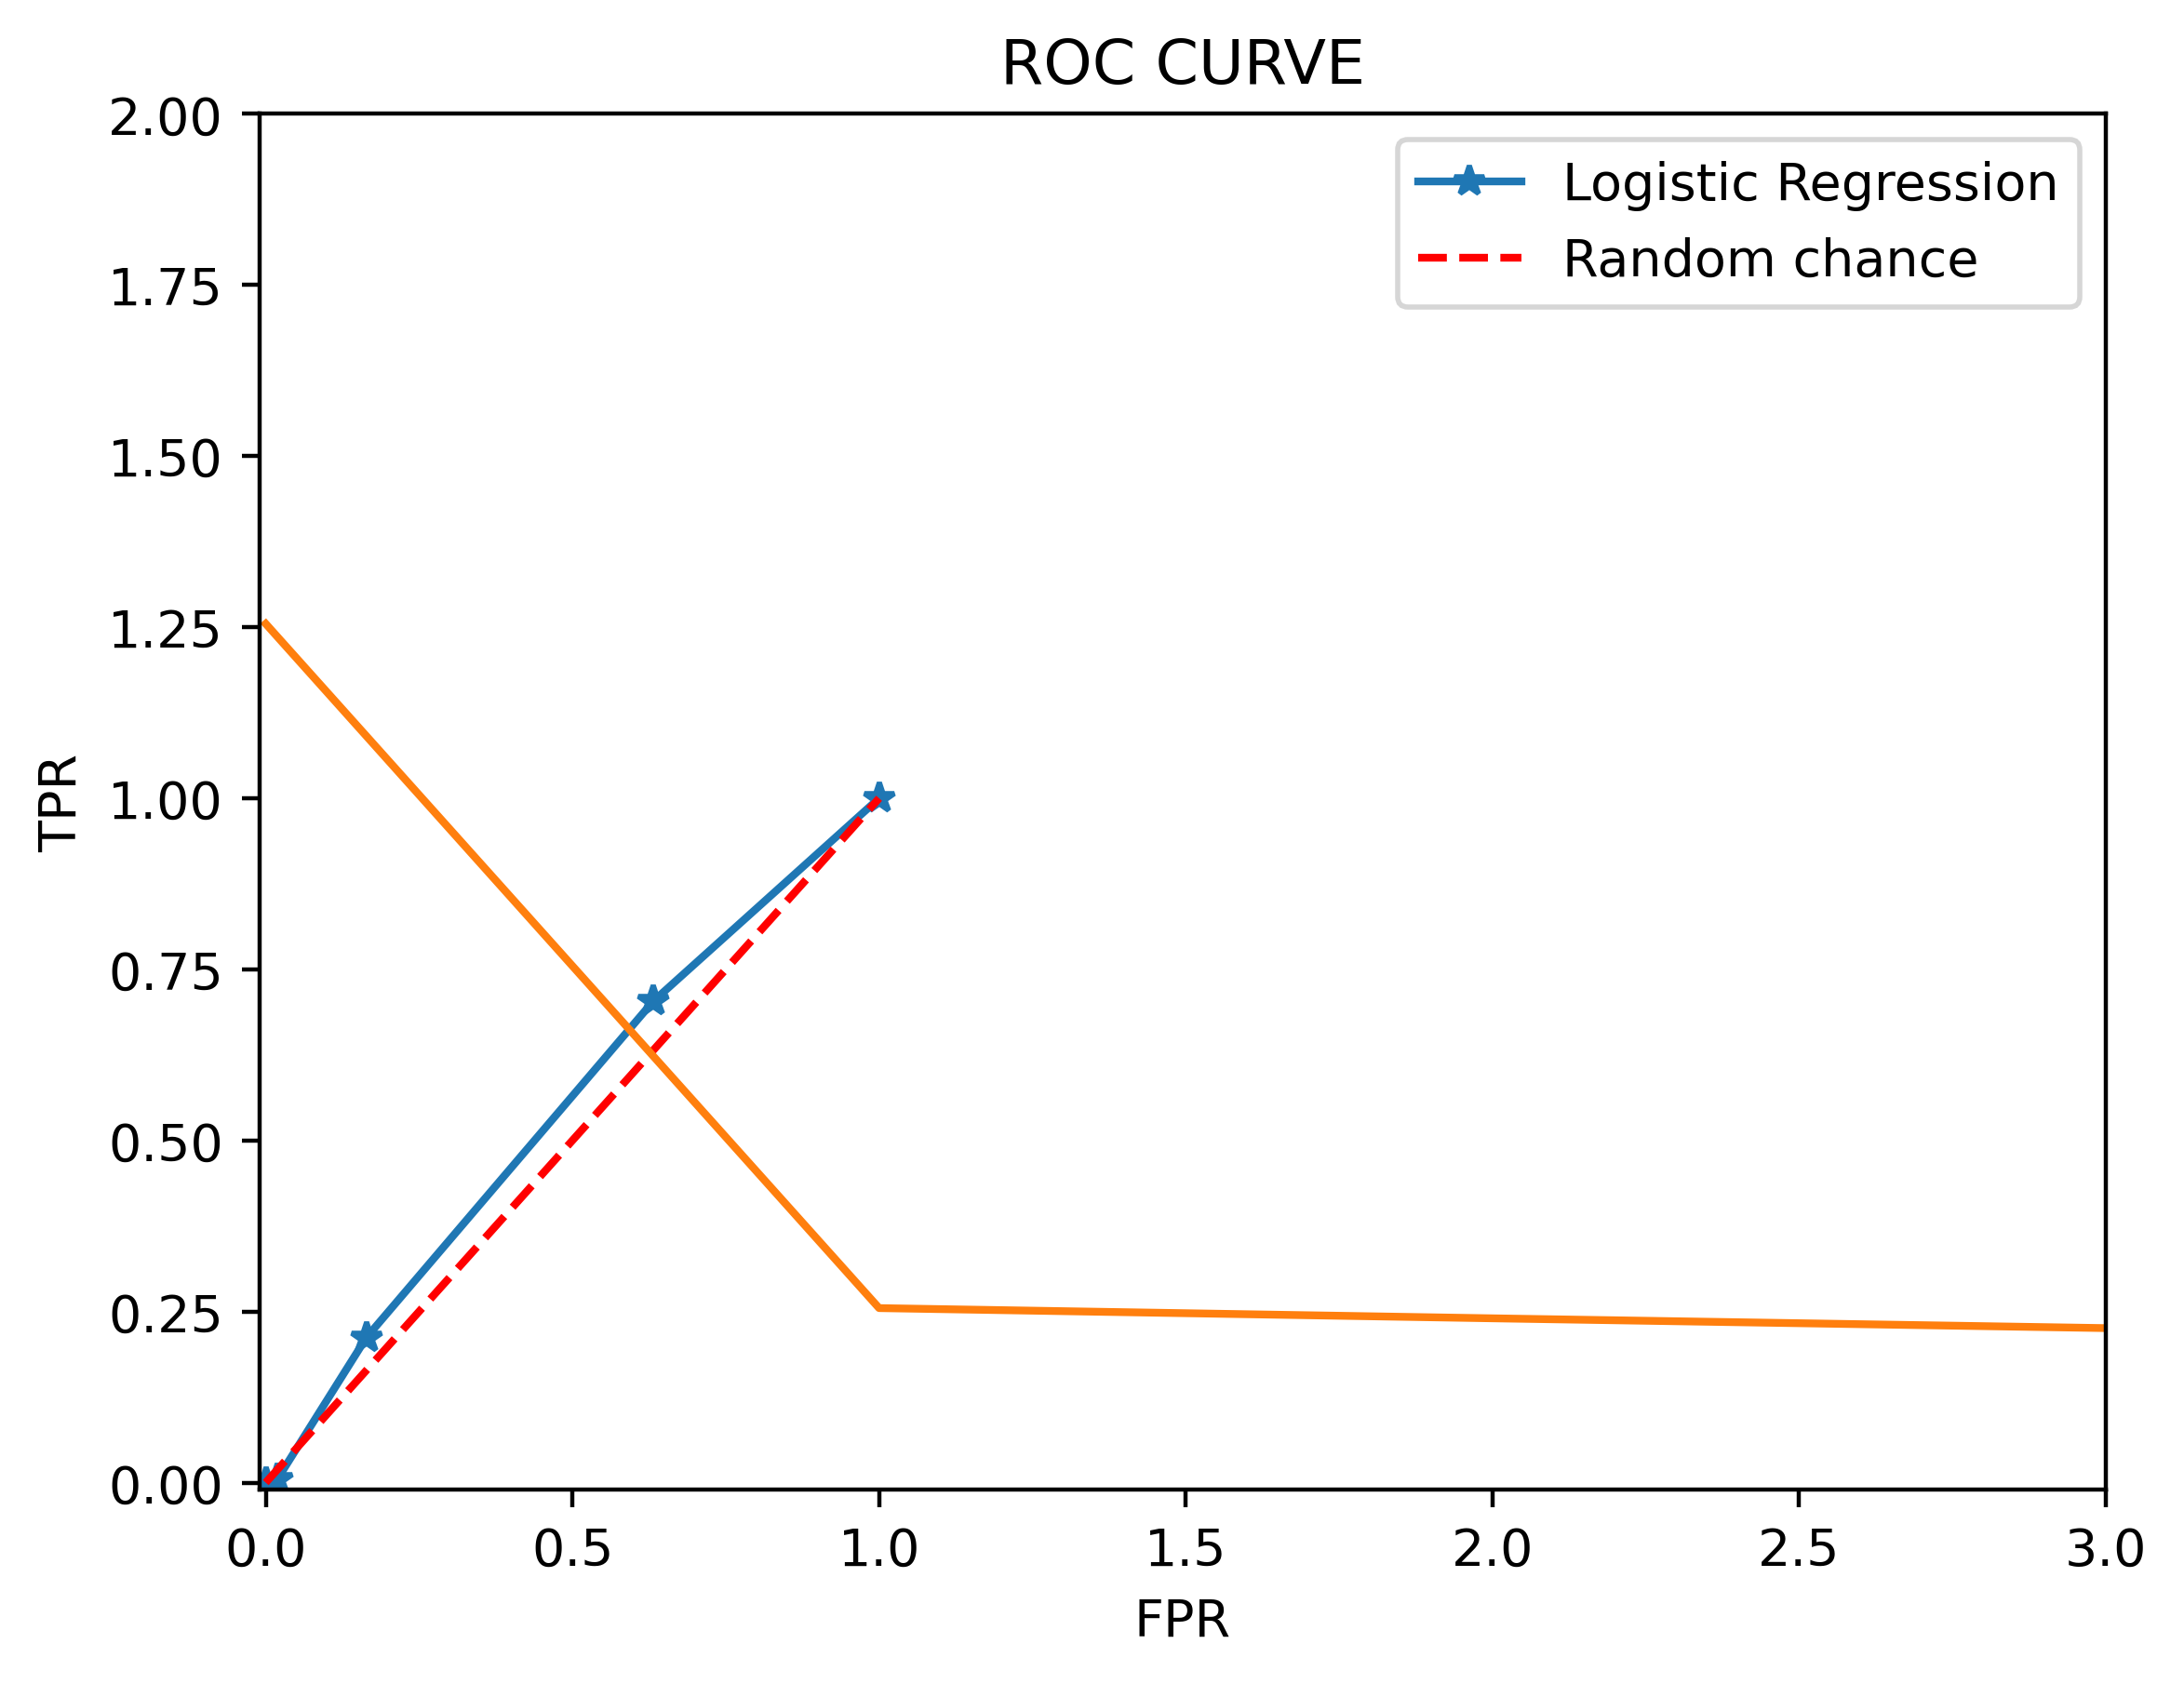

In [86]:
plt.plot(fpr,tpr, '*-')
plt.plot([0,1],[0,1],'r--')
plt.plot(thresholds)
plt.legend(['Logistic Regression','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.xlim([-0.01,3])
plt.ylim([-0.01,2])

In [83]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [88]:
metrics.roc_auc_score(y_test, pos_prob)

0.5434650477972642

## Activity 2.01
